In [1]:
#Here are all the necessary imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import tensorflow.keras.metrics

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
#Read in the data from Kaggle dataset from Github and print data, removes useless columns from csv
readData = pd.read_csv("https://raw.githubusercontent.com/CianMc98/HousingDataNN/main/Housing.csv")
readData = readData.drop(columns= ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning",
                                   "prefarea", "furnishingstatus" ])

readData.head()

price  area  bedrooms  bathrooms  stories  parking
0  13300000  7420         4          2        3        2
1  12250000  8960         4          4        4        3
2  12250000  9960         3          2        2        2
3  12215000  7500         4          2        2        3
4  11410000  7420         4          1        2        2

In [3]:
#Identify the rows(all remaining rows) and column (number of bedrooms in the house)
row = readData.iloc[:,1:5].values
col = readData.iloc[:,0].values


In [4]:
#Normalise the input data 0-1 with scikit - preprocessing
minmaxScaler = preprocessing.MinMaxScaler()
x = minmaxScaler.fit_transform(row)


#Remove comment from next line to normalise output data between 0-1, commented out as results 
col = np.interp(col, (col.min(), col.max()), (0, +1))
col[:50]

array([1.        , 0.90909091, 0.90909091, 0.90606061, 0.83636364,
       0.78787879, 0.72727273, 0.72727273, 0.7030303 , 0.6969697 ,
       0.6969697 , 0.68666667, 0.65454545, 0.64848485, 0.64848485,
       0.63636364, 0.63636364, 0.62424242, 0.61818182, 0.61515152,
       0.60606061, 0.6       , 0.5969697 , 0.5969697 , 0.59090909,
       0.58787879, 0.58121212, 0.57575758, 0.57575758, 0.57575758,
       0.57575758, 0.57575758, 0.56666667, 0.55757576, 0.55151515,
       0.54813333, 0.54484848, 0.53939394, 0.53787879, 0.53333333,
       0.53030303, 0.52727273, 0.51515152, 0.51515152, 0.5030303 ,
       0.5030303 , 0.5       , 0.4969697 , 0.49393939, 0.49090909])

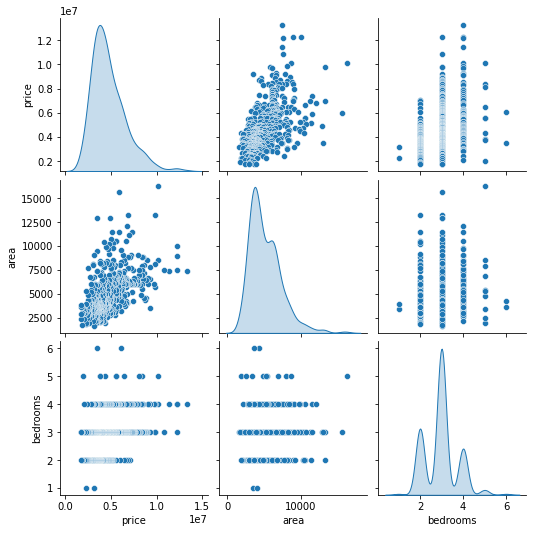

In [5]:
sns.pairplot(readData[['price', 'area' , 'bedrooms']], diag_kind='kde')


In [6]:
#Using scikit to split dataset into training and test/validation data and then split dataset into test and validation data
trainx, testvalx, trainy, testvaly = train_test_split(x, col, test_size = 0.3)
valx, testx, valy, testy = train_test_split(testvalx, testvaly, test_size = 0.5)

print(trainx.shape, valx.shape, testx.shape, trainy.shape, valy.shape, testy.shape)


(381, 4) (82, 4) (82, 4) (381,) (82,) (82,)


In [7]:
#Setting up the Model for NN ( 32 layer x 32 layer and output to 1 layer )
# Sequential and Dense, already imported from tensorflow.keras.~
model = Sequential([
    Dense(32, activation = 'relu', input_shape=(4,)), 
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'linear'),
    
])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Configuring the Model for optimisation
model.compile(optimizer= 'adam',
              loss = 'mse',
              metrics = ["accuracy"],
             )

In [9]:
#Fit the model 
hist = model.fit(trainx, trainy, validation_data = (valx, valy), epochs = 50, batch_size = 64, validation_split = 0.175)

Epoch 1/50
5/5 [==============================] - 0s 86ms/step - loss: 0.0662 - accuracy: 0.0032 - val_loss: 0.0537 - val_accuracy: 0.0149
Epoch 2/50
5/5 [==============================] - 0s 22ms/step - loss: 0.0476 - accuracy: 0.0032 - val_loss: 0.0380 - val_accuracy: 0.0149
Epoch 3/50
5/5 [==============================] - 0s 20ms/step - loss: 0.0347 - accuracy: 0.0032 - val_loss: 0.0271 - val_accuracy: 0.0149
Epoch 4/50
5/5 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 0.0032 - val_loss: 0.0209 - val_accuracy: 0.0149
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 0.0228 - accuracy: 0.0032 - val_loss: 0.0180 - val_accuracy: 0.0149
Epoch 6/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0217 - accuracy: 0.0032 - val_loss: 0.0166 - val_accuracy: 0.0149
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0207 - accuracy: 0.0032 - val_loss: 0.0154 - val_accuracy: 0.0149
Epoch 8/50
5/5 [=============

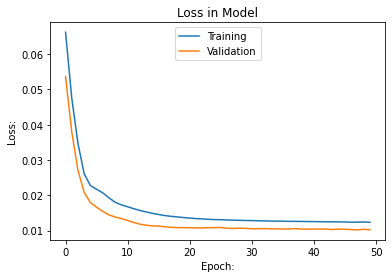

In [10]:
# Plotting loss to graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss in Model')
plt.ylabel('Loss:')
plt.xlabel('Epoch:')
plt.legend(['Training', 'Validation'], loc='upper center')
plt.show()

